<a href="https://colab.research.google.com/github/alvaradovallejo-juan/FashionMNIST/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST Dataset

##Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Fashion MNIST Dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##Exploring data

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

##Preparing data

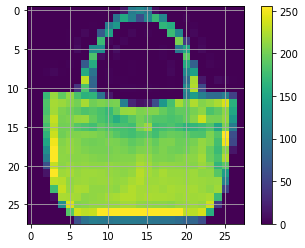

In [ ]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)
plt.colorbar()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

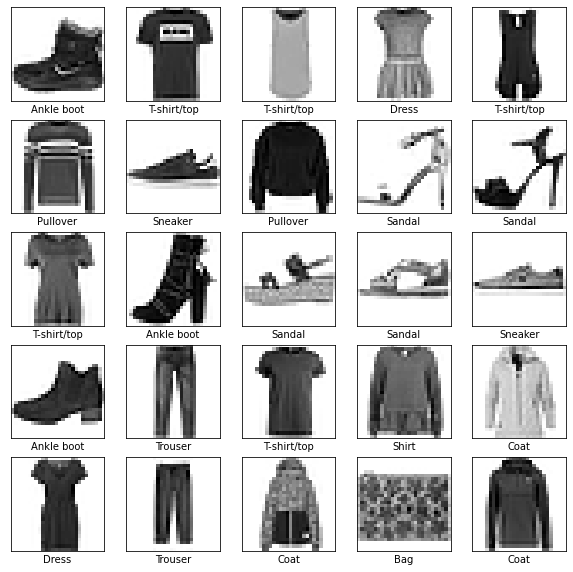

In [ ]:
plt.figure(figsize = (10,10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

##The model

In [ ]:
model = keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)), 
                          tf.keras.layers.Dense(128, activation = 'relu'), 
                          tf.keras.layers.Dense(10)
                          ])

In [ ]:
model.compile(optimizer = 'adam',
              loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

In [77]:
history = model.fit(train_images, train_labels, epochs = 8, 
                    validation_data=(test_images, test_labels))
history

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1331 - accuracy: 0.9500 - val_loss: 0.4097 - val_accuracy: 0.8901
Epoch 2/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1301 - accuracy: 0.9506 - val_loss: 0.3963 - val_accuracy: 0.8896
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1283 - accuracy: 0.9513 - val_loss: 0.4348 - val_accuracy: 0.8875
Epoch 4/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1254 - accuracy: 0.9520 - val_loss: 0.4291 - val_accuracy: 0.8854
Epoch 5/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1225 - accuracy: 0.9531 - val_loss: 0.4137 - val_accuracy: 0.8920
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1197 - accuracy: 0.9554 - val_loss: 0.4431 - val_accuracy: 0.8816
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1172 - accuracy: 0.9555 - val_loss: 0.4440 - val_accuracy: 0.8927

##Evaluating accuracy

In [65]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3767 - accuracy: 0.8866
Accuracy:  0.8866000175476074


##Predictions

In [66]:
model_probability = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()
                                        ])
predictions = model_probability.predict(test_images)

In [67]:
predictions[100]

array([9.8589982e-05, 9.2456975e-09, 1.6936719e-08, 9.9987388e-01,
       1.1765687e-09, 8.1344410e-08, 2.7419988e-05, 1.3532802e-16,
       4.8372661e-10, 3.2887868e-12], dtype=float32)

In [68]:
# The model works!!
test_labels[100] == np.argmax(predictions[100])

True

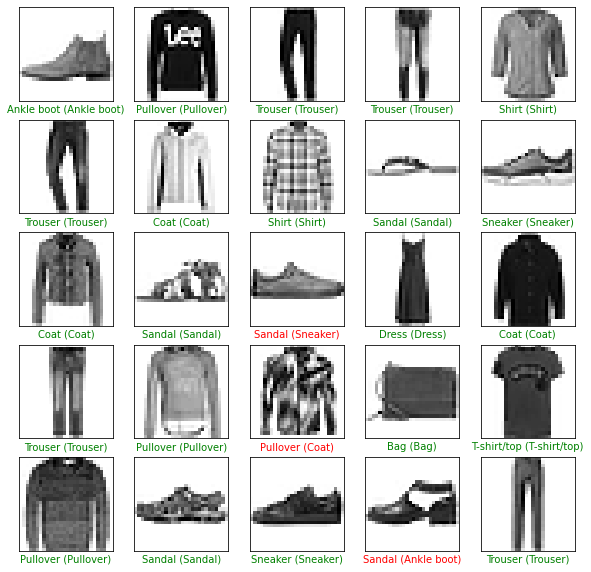

In [69]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)

In [70]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

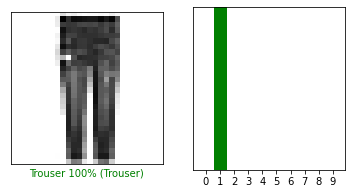

In [71]:
i = 200
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

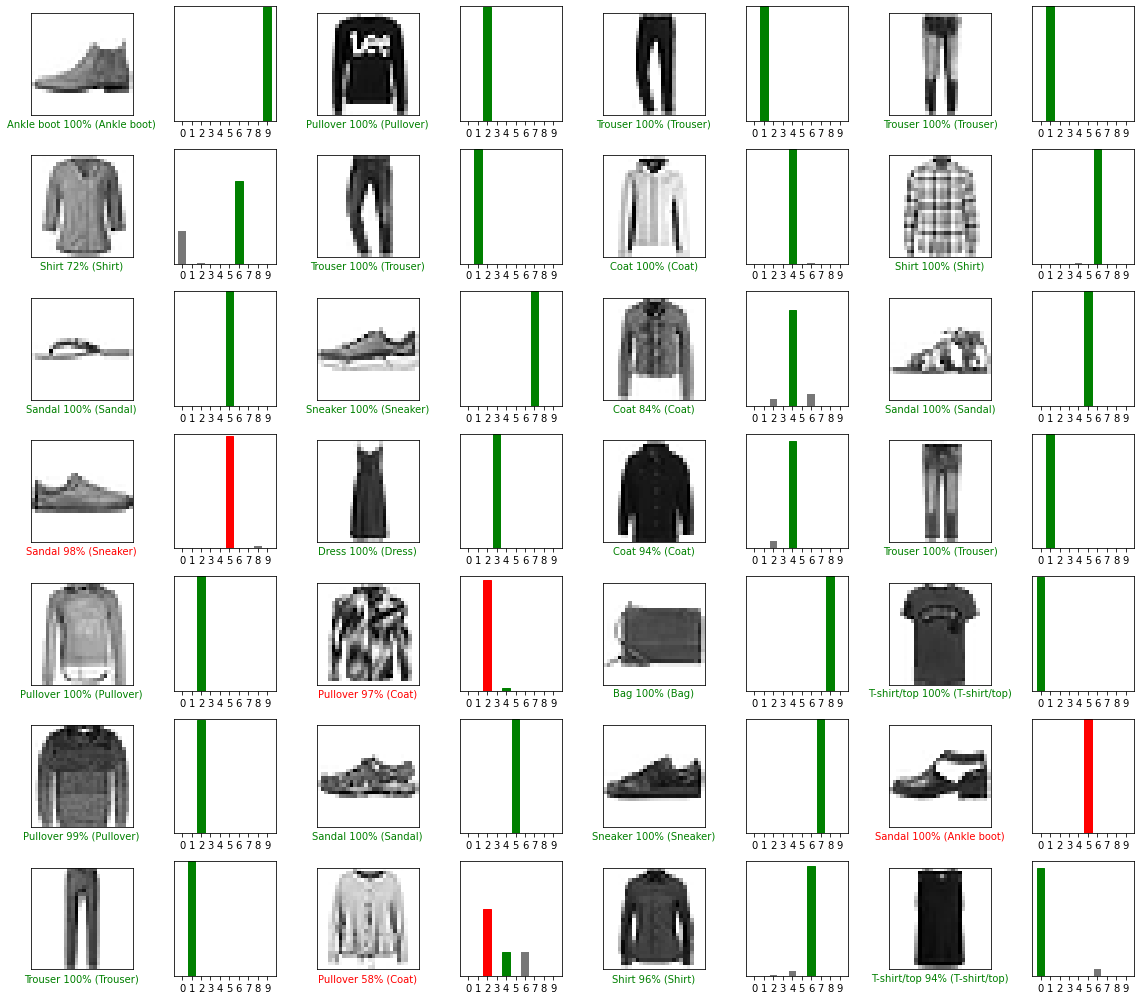

In [72]:
num_rows = 7
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

##Other metrics

313/313 - 0s - loss: 0.4636 - accuracy: 0.8818 - 421ms/epoch - 1ms/step


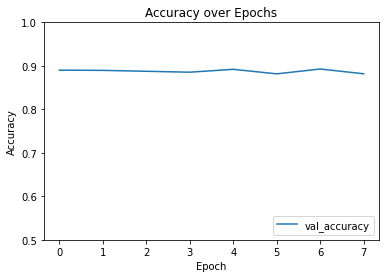

In [79]:
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Accuracy over Epochs')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)